## Pràctica 1: Resolem un problema de classificacio

### EDA (exploratory data analysis)

In [1]:
import pandas as pd
import matplotlib.pyplot as bplt
import seaborn as sns

Quants atributs té la vostra base de dades?

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.000,C148,C


Quin tipus d'atributs tens? (Númerics, temporals, categorics, binaris...)

In [8]:
# Obtiene información sobre el tipo de datos y los valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None



| Variable    | Tipo        | Descripción                                         |
|------------ |------------ |--------------------------------------------------- |
| passengerId | int         | Valor de identificación único de cada pasajero     |
| name        | string      | Nombre del pasajero                                |
| sex         | factor      | Género (masculino o femenino)                      |
| age         | numeric     | Edad de la persona (niños menores de 12 meses representados en fracción de año) |
| class       | factor      | Clase del servicio a bordo                        |
| embarked    | factor      | Puerto de embarque de las personas                |
| ticketno    | numeric     | Número de ticket (NA para la tripulación)         |
| fare        | numeric     | Precio del ticket (NA para la tripulación, músicos, empleados y otros) |
| sibsp       | factor ordenado | Número de hermanos/familiares                  |
| cabin       | factor      | Tipo de cabina ocupada por el pasajero            |
| parch       | factor ordenado | Número de padres e hijos a bordo               |
| survived    | factor 2 de dos niveles | Sobrevivencia (Sí o No) al hundimiento      |

Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)

Categorical Features: Survived, Sex, Embarked, Pclass, Name, PassengerId

Alphanumeric Features: Ticket, Cabin

In [5]:
# Resumen estadístico de las variables numéricas
print(df.describe(include="all"))

        PassengerId  Survived  Pclass                     Name   Sex     Age  \
count       891.000   891.000 891.000                      891   891 714.000   
unique          NaN       NaN     NaN                      891     2     NaN   
top             NaN       NaN     NaN  Braund, Mr. Owen Harris  male     NaN   
freq            NaN       NaN     NaN                        1   577     NaN   
mean        446.000     0.384   2.309                      NaN   NaN  29.699   
std         257.354     0.487   0.836                      NaN   NaN  14.526   
min           1.000     0.000   1.000                      NaN   NaN   0.420   
25%         223.500     0.000   2.000                      NaN   NaN  20.125   
50%         446.000     0.000   3.000                      NaN   NaN  28.000   
75%         668.500     1.000   3.000                      NaN   NaN  38.000   
max         891.000     1.000   3.000                      NaN   NaN  80.000   

         SibSp   Parch  Ticket    Fare 

- El total de pasageros es 891
- Existen columnas con muchos Nans: Age y Cabin 
        

In [7]:
print(pd.isnull(df).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Com es el target, quantes categories diferents existeixen?

In [34]:
# Resumen estadístico de las variables categóricas
print(df.describe(include='object'))

                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644


Tenim nans en les dades?

In [39]:
def has_nans(df):
  return df.isna().sum().sum()>0

print (has_nans(df))

True


Podeu veure alguna correlació entre X i y?

<AxesSubplot:>

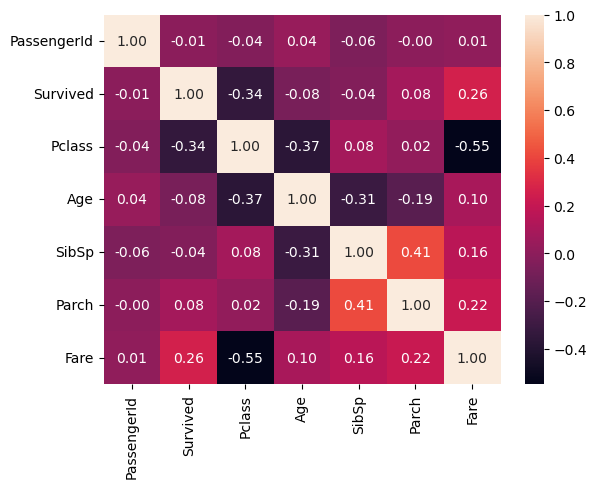

In [23]:
# Calcular la matriz de correlación
sns.heatmap(df.corr(),annot = True, fmt = ".2f")


Estan balancejades les etiquetes (distribució similar entre categories)? Creus que pot afectar a la classificació la seva distribució?

In [12]:
# Contar el número de pasajeros que sobrevivieron y que no sobrevivieron
survival_counts = df['Survived'].value_counts()


# Visualizar la proporción de sobrevivientes
print(survival_counts)

male      577
female    314
Name: Sex, dtype: int64


No, las etiquetas no están balanceadas, de hecho están muy desbalanceadas. En un gráfico se puede ver mejor:

% mujeres supervivientes: 74.20382165605095
% hombres supervivientes: 18.890814558058924
male      577
female    314
Name: Sex, dtype: int64


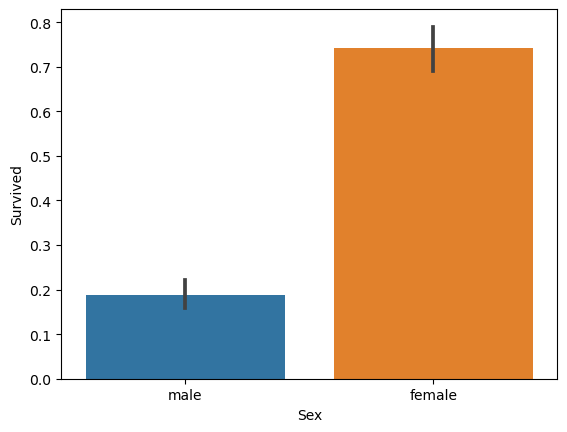

In [13]:
sns.barplot(x="Sex", y="Survived", data=df)

print("% mujeres supervivientes:", df["Survived"][df["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("% hombres supervivientes:", df["Survived"][df["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

print(df['Sex'].value_counts())

Las mujeres son más propensas a sobrevivir

### Conclusiones tras el EDA

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


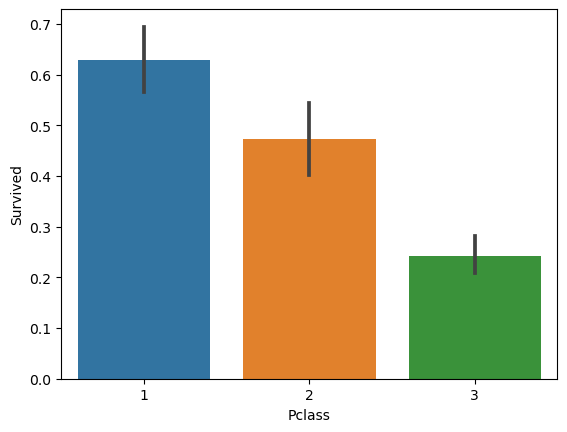

In [13]:
sns.barplot(x="Pclass", y="Survived", data=df)

print("Percentage of Pclass = 1 who survived:", df["Survived"][df["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df["Survived"][df["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df["Survived"][df["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of Embarked = S who survived: 33.69565217391305
Percentage of Embarked = C who survived: 55.35714285714286
Percentage of Embarked = Q who survived: 38.961038961038966


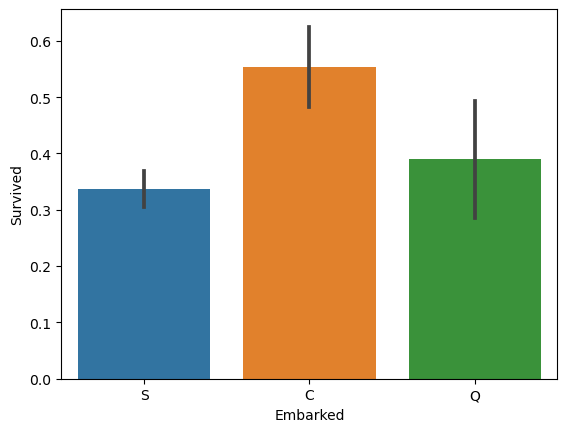

In [27]:
sns.barplot(x="Embarked", y="Survived", data=df)

print("Percentage of Embarked = S who survived:", df["Survived"][df["Embarked"] == 'S'].value_counts(normalize = True)[1]*100)

print("Percentage of Embarked = C who survived:", df["Survived"][df["Embarked"] == 'C'].value_counts(normalize = True)[1]*100)

print("Percentage of Embarked = Q who survived:", df["Survived"][df["Embarked"] == 'Q'].value_counts(normalize = True)[1]*100)

In [ ]:
sns.barplot(x="Embarked", y="Survived", data=df)

print("Percentage of Embarked = S who survived:", df["Survived"][df["Embarked"] == 'S'].value_counts(normalize = True)[1]*100)

print("Percentage of Embarked = C who survived:", df["Survived"][df["Embarked"] == 'C'].value_counts(normalize = True)[1]*100)

print("Percentage of Embarked = Q who survived:", df["Survived"][df["Embarked"] == 'Q'].value_counts(normalize = True)[1]*100)

SibSp/Parch: People traveling alone are more likely to survive.

Age: Young children are more likely to survive.

Pclass: People of higher socioeconomic class are more likely to survive.

### Preprocessing (normalitzation, outlier removal, feature selection..)

Estàn les dades normalitzades? Caldria fer-ho?

In [22]:
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId', 'Fare'])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000,1,0,7.250,S
1,1,1,female,38.000,1,0,71.283,C
2,1,3,female,26.000,0,0,7.925,S
3,1,1,female,35.000,1,0,53.100,S
4,0,3,male,35.000,0,0,8.050,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000,0,0,13.000,S
887,1,1,female,19.000,0,0,30.000,S
888,0,3,female,NaN,1,2,23.450,S
889,1,1,male,26.000,0,0,30.000,C


Drop Cabinas por el numero de nulls

Drop Fare por que influye en la predicción, no tiene correlación con el resto excepto con Pclass

In [16]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)


KeyError: "['Cabin'] not found in axis"

En cas que les normalitzeu, quin tipus de normalització será més adient per les vostres dades?

Teniu gaires dades sense informació (nans)? Tingueu en compte que hi ha metodes que no els toleren durant el aprenentatge. Com afecta a la classificació si les filtrem? I si les reompliu? Com ho farieu?

In [ ]:
percent_nan_fila = df.isna().mean(axis = 0)
def print_percentage_nan(percentage_nan):
  #printeja l'informacio de % de nans de cada columna
  for col,percentage in percentage_nan.to_dict().items():
    print (col,percentage)
print_percentage_nan(percent_nan_fila)

# Elimina filas con valores nulos
# df.dropna(inplace=True)

Teniu dades categoriques? Quina seria la codificació amb més sentit?

In [ ]:
Si, concretamente Survived, Sex, Embarked, Pclass

Podreu treure algun atribut extra de les categoriques (per exemple, aplicant alguna regla sobre el text)?

Caldria aplicar PCA? Quins beneficis o inconvenients trobarieu?

Caldria aplicar alguna tecnica de seleccio de features? Ho trobeu necessari?

Es poden aplicar PolynomialFeatures per millorar la classificació? En quins models té sentit fer-ho?

## Metric selection

A teoria, hem vist el resultat d'aplicar el accuracy_score sobre dades no balancejades. Podrieu explicar i justificar quina de les següents mètriques será la més adient pel vostre problema? accuracy_score, f1_score o average_precision_score?

Abans de comencar a entrenar models, genereu una suite de funcions per poder analitzar graficament com esta anant el vostre model. Mostreu la Precisió-Recall Curve i la ROC Curve. Quina és més rellevant pel vostre dataset? Expliqueu amb les vostres paraules, la diferencia entre una i altre Pista

Què mostra classification_report? Quina métrica us fixareu per tal de optimitzar-ne la classificació pel vostre cas?

## Model Selection amb validacio creuada

Quins models heu considerat? Perque els heu seleccionat?

Fent servir validacio creuada, escolliu el millor model (agafant els hiperparamtres per defecte). Recordeu fer servir la metrica utilitzada en l'apartat anterior. Perque es important fer servir validacio creuada? Heu de fer servir algun tipus de validacio creuada en especial?

Seleccioneu una serie d'hyperparametres a provar per cadascun dels models i realitzeu una cerca d'hyperparametres. Hi ha algun model que creieu que podeu descartar de primeres? Perque?

Mostreu els resultats en una taula on es mostri el model, els experiments realitzats i els resultats obtinguts (tant en train com en test). Podeu mostrar tambe el temps d'entrenament de cada model.

Quin tipus de K-fold heu escollit en la seleccio de models? I en la seleccio de models amb hyperparametres? Com afecta al resultat modificar el numero de k (numero de folds) al resultat?

Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant? documentació Quina heu seleccionat?

Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels métodes creieu que obtindrà millor resultat final?

Existeixen altres mètodes de búsqueda més eficients (scikit-optimize)?

Opcional : Feu la prova, i amb el model i el metode de crossvalidació escollit, configureu els diferents metodes de búsqueda per a que s'executin durant el mateix temps (i.e. depenent del problema, 0,5h-1 hora). Analitzeu quin ha arribat a una millor solució. (Ajuda: estimeu el temps que trigarà a fer 1 training el vostre model, i aixi trobeu el número de intents que podeu fer en cada cas.)

## Analisi Final

In [ ]:
dftest = pd.read_csv('test.csv')

Mostreu les curves ROC/PR (la que hageu escollit en l'apartat 2) i interpreteu els resultats.

Analitzeu en detall les diferents metriques que trobeu adients i comenteu per sobre com podrieu fer servir aquest model en un futur. Aixo es el que es coneix com un cas d'us.

Com creieu que es podria millorar el vostre model?